In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("AirQuality.csv")

In [3]:
df

,Country,City,CO_AQI_Value,Ozone_AQI_Value,NO2 _AQI_Value,PM2.5_AQI_Value,AQI_Value,Category
0,Russian Federation,Praskoveya,1,36,0,51,51,Moderate
1,Brazil,Presidente Dutra,1,5,1,41,41,Good
2,Italy,Priolo Gargallo,1,39,2,66,66,Moderate
3,Poland,Przasnysz,1,34,0,20,34,Good
4,France,Punaauia,0,22,0,6,22,Good
...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,3,154,2,184,184,Unhealthy
23459,France,Sceaux,1,20,5,50,50,Good
23460,India,Mormugao,1,22,1,50,50,Good
23461,United States of America,Westerville,1,44,2,71,71,Moderate


In [4]:
df.describe()

,CO_AQI_Value,Ozone_AQI_Value,NO2 _AQI_Value,PM2.5_AQI_Value,AQI_Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,1.368367,35.193709,3.063334,68.519755,72.010868
std,1.832064,28.098723,5.254108,54.796443,56.055220
min,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,21.000000,0.000000,35.000000,39.000000
50%,1.000000,31.000000,1.000000,54.000000,55.000000
75%,1.000000,40.000000,4.000000,79.000000,79.000000
max,133.000000,235.000000,91.000000,500.000000,500.000000


In [5]:
print(df.min())

CO_AQI_Value          0
Ozone_AQI_Value       0
NO2 _AQI_Value        0
PM2.5_AQI_Value       0
AQI_Value             6
Category           Good
dtype: object


In [6]:
print(df.max())

CO_AQI_Value                  133
Ozone_AQI_Value               235
NO2 _AQI_Value                 91
PM2.5_AQI_Value               500
AQI_Value                     500
Category           Very Unhealthy
dtype: object


In [7]:
print(df.mean())

CO_AQI_Value        1.368367
Ozone_AQI_Value    35.193709
NO2 _AQI_Value      3.063334
PM2.5_AQI_Value    68.519755
AQI_Value          72.010868
dtype: float64


In [8]:
print(df.median())

CO_AQI_Value        1.0
Ozone_AQI_Value    31.0
NO2 _AQI_Value      1.0
PM2.5_AQI_Value    54.0
AQI_Value          55.0
dtype: float64


In [9]:
np.std(df)

CO_AQI_Value        1.832025
Ozone_AQI_Value    28.098125
NO2 _AQI_Value      5.253996
PM2.5_AQI_Value    54.795275
AQI_Value          56.054026
dtype: float64

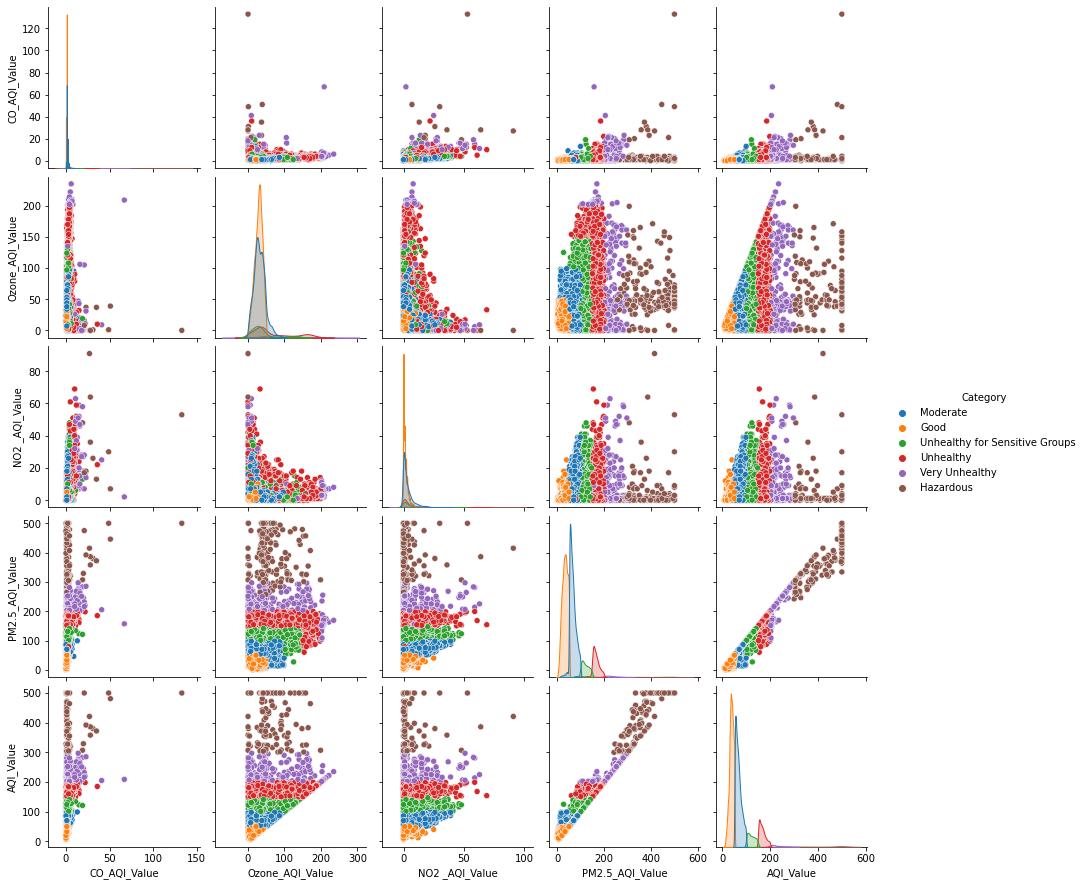

In [10]:
sns.pairplot(df,hue = 'Category')

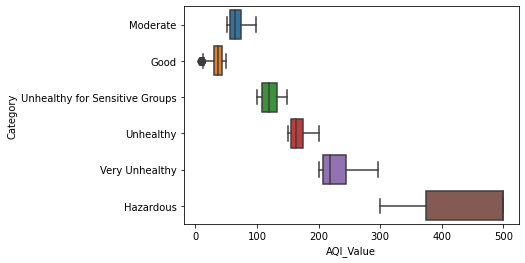

In [11]:
sns.boxplot( x="AQI_Value", y='Category', data=df )
plt.show()

<AxesSubplot:xlabel='CO_AQI_Value'>

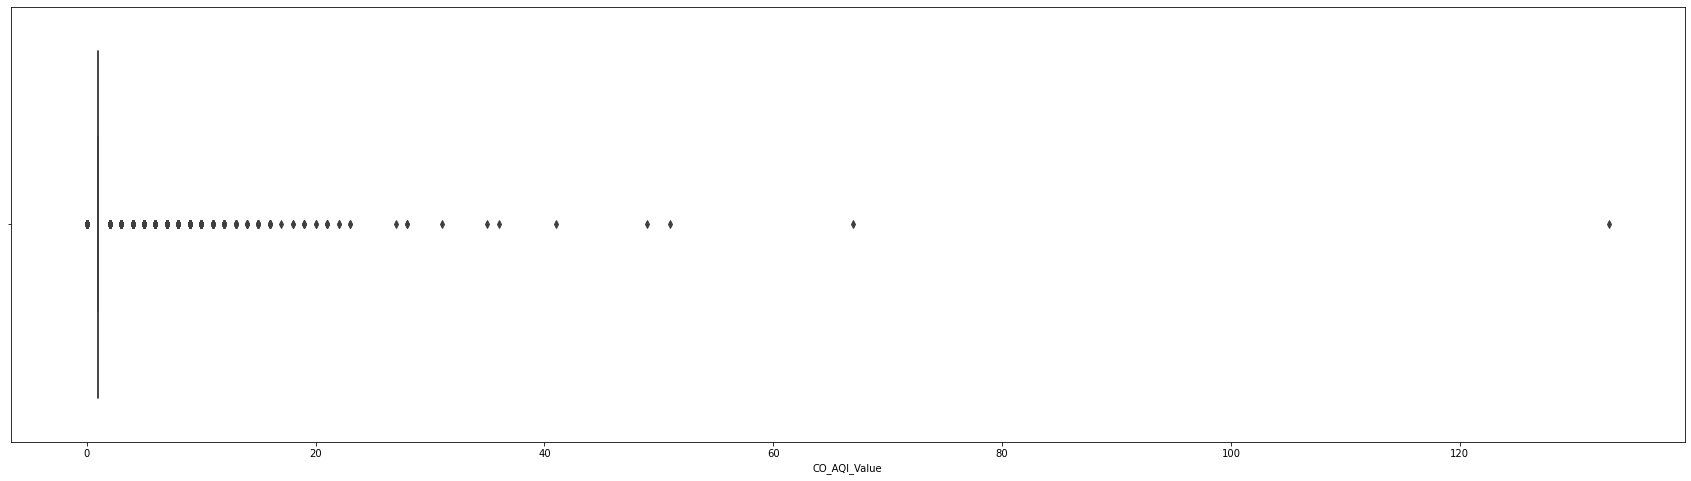

In [12]:
plt.figure(figsize=(30,8))

sns.boxplot(x='CO_AQI_Value', data=df)

<AxesSubplot:xlabel='Ozone_AQI_Value'>

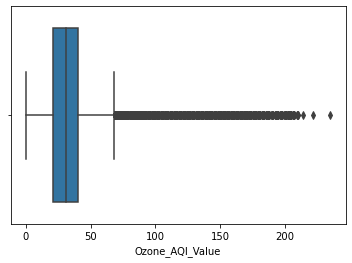

In [13]:
sns.boxplot(x='Ozone_AQI_Value', data=df)

<AxesSubplot:xlabel='NO2 _AQI_Value'>

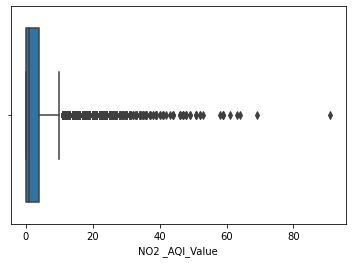

In [14]:
sns.boxplot(x='NO2 _AQI_Value', data=df)

<AxesSubplot:xlabel='PM2.5_AQI_Value'>

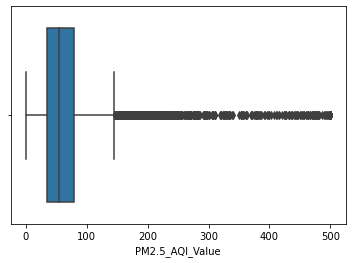

In [15]:
sns.boxplot(x='PM2.5_AQI_Value', data=df)

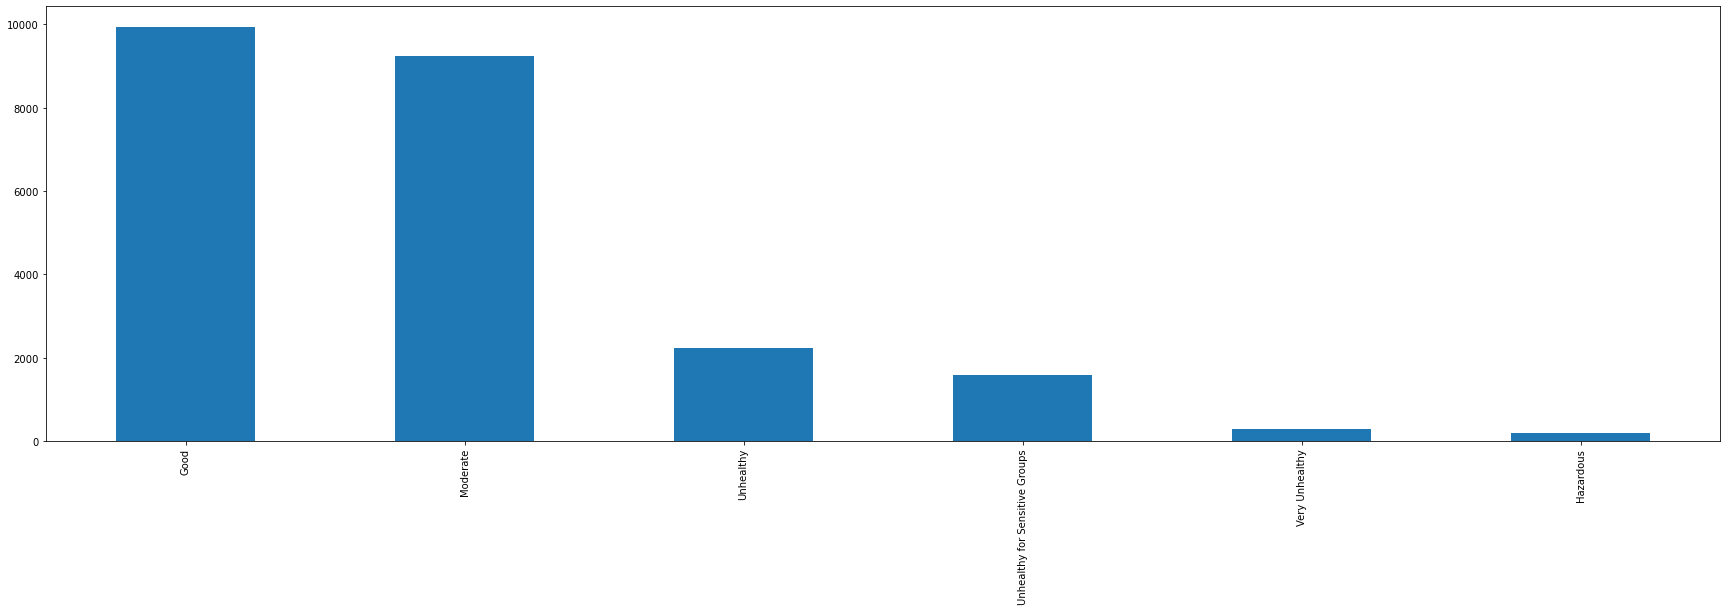

In [16]:
plt.figure(figsize=(30,8))

df.Category.value_counts().plot(kind = 'bar')

plt.show()

<AxesSubplot:>

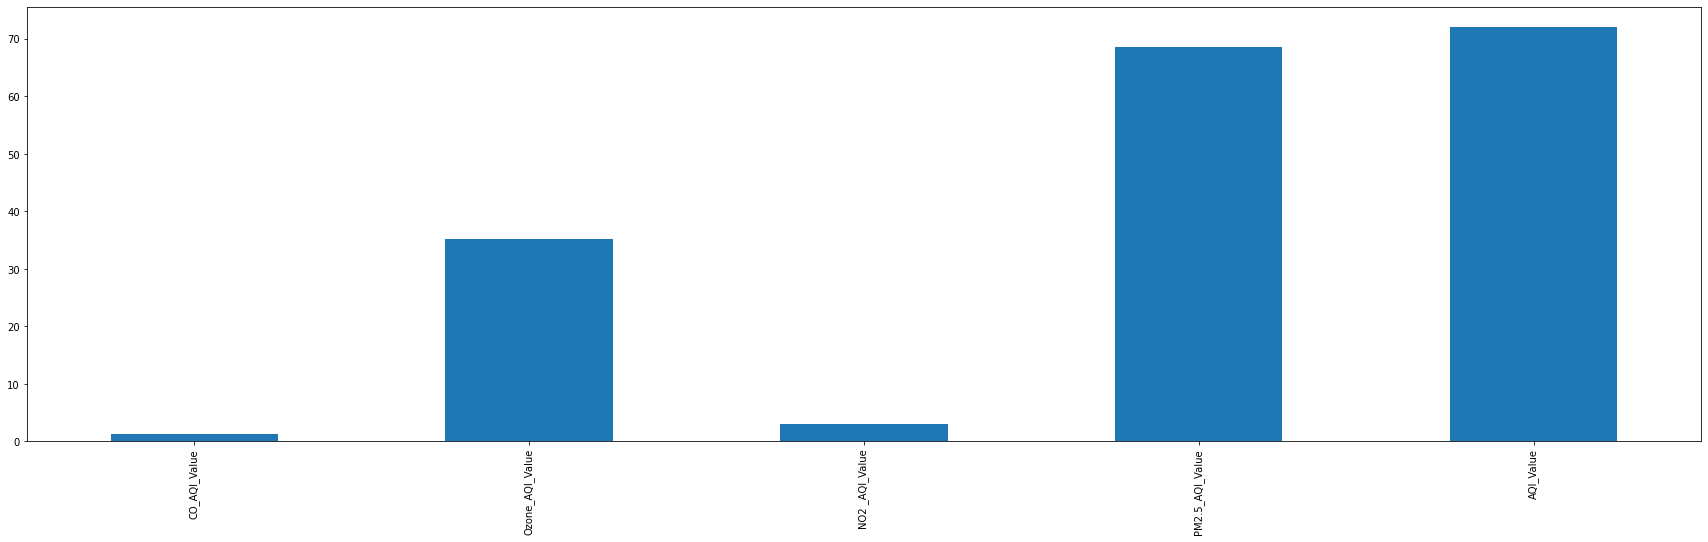

In [17]:
plt.figure(figsize=(30,8))
df.mean().plot(kind='bar')

In [18]:
from scipy.stats import spearmanr

rho, p = spearmanr(df['AQI_Value'], df['PM2.5_AQI_Value'])

print(rho)

print(p)

0.967899229221191
0.0


In [19]:
rho, p = spearmanr(df['AQI_Value'], df['CO_AQI_Value'])

print(rho)

print(p)

0.6004805144331273
0.0


In [20]:
rho, p = spearmanr(df['AQI_Value'], df['Ozone_AQI_Value'])

print(rho)

print(p)

0.24582592877096326
0.0


In [21]:
rho, p = spearmanr(df['AQI_Value'], df['NO2 _AQI_Value'])

print(rho)

print(p)

0.25785634912601135
0.0


In [22]:
df['Category'].replace(['Good', 'Moderate','Unhealthy','Unhealthy for Sensitive Groups','Very Unhealthy','Hazardous'],
                        [1, 2, 3, 4, 5, 6], inplace=True)

In [23]:
df_model = df.copy()

scaler = RobustScaler()
features = [['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2 _AQI_Value', 'PM2.5_AQI_Value', 'AQI_Value','Category']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])


In [24]:
x = df_model.drop(columns=['Country','City','Category'])
y = df_model['Category']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(x_test)

In [27]:
print(accuracy_score(y_test, y_pred))

0.9725122522906456
